
---

![BankMarketing](data/images/BankMarketing.jpg)

# About Dataset 📊

The dataset pertains to direct marketing campaigns conducted via phone calls by a Portuguese banking institution. The primary objective of this dataset is to predict whether a client will subscribe to a term deposit based on various demographic and behavioral features. 📞💼

## Dataset Characteristics
- **Type:** Bivariate 🔢
- **Subject Area:** Business 💼
- **Associated Tasks:** Classification 🏷️

## Additional Information

This dataset involves marketing campaigns where phone calls were the primary communication method. In many cases, multiple interactions with the same client were necessary to ascertain whether they would subscribe to the term deposit product. The goal is to build a model that accurately predicts the likelihood of subscription (`'yes'` or `'no'`), based on the provided features. 📞📈

Understanding the factors that influence a client's decision to subscribe can help the bank refine its marketing strategies, allocate resources more efficiently, and ultimately improve campaign effectiveness. This analysis can also offer valuable insights into client behavior, enabling the development of more targeted marketing approaches. 🧠💡

## Input Variables

| **Variable** | **Description** | **Type** |
|--------------|-----------------|----------|
| `age`        | Age of the client | Numeric  |
| `job`        | Type of job | Categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services" |
| `marital`    | Marital status | Categorical: "married", "divorced", "single"; note: "divorced" includes both divorced and widowed |
| `education`  | Level of education | Categorical: "unknown", "secondary", "primary", "tertiary" |
| `default`    | Credit in default? | Binary: "yes", "no" |
| `balance`    | Average yearly balance, in euros | Numeric |
| `housing`    | Has a housing loan? | Binary: "yes", "no" |
| `loan`       | Has a personal loan? | Binary: "yes", "no" |
| `contact`    | Type of contact communication | Categorical: "unknown", "telephone", "cellular" |
| `day`        | Last contact day of the month | Numeric |
| `month`      | Last contact month of the year | Categorical: "jan", "feb", "mar", …, "nov", "dec" |
| `duration`   | Last contact duration, in seconds | Numeric |
| `campaign`   | Number of contacts performed during this campaign for this client (includes last contact) | Numeric |
| `pdays`      | Number of days since the client was last contacted from a previous campaign (-1 means client was not previously contacted) | Numeric |
| `previous`   | Number of contacts performed before this campaign for this client | Numeric |
| `poutcome`   | Outcome of the previous marketing campaign | Categorical: "unknown", "other", "failure", "success" |

## Output Variable (Desired Target) 🎯
- **y:** Has the client subscribed to a term deposit? (binary: "yes", "no")

## Future Enhancements 🚀

This notebook represents the initial version of our analysis and model evaluation. Moving forward, we plan to enhance several aspects, including:

- **Exploratory Data Analysis (EDA)**: Further exploration and deeper insights into the dataset will be conducted to uncover additional patterns and relationships. 🔍📊
- **Model Evaluation and Development**: We will refine the model selection process and performance evaluation to ensure the best possible outcomes. 🔬📈
- **Code Improvement**: Ongoing optimizations and improvements will be made to the code to enhance its efficiency and readability. 🛠️💻

Stay tuned for future updates as we continue to build on this foundation and make advancements in our analysis. 📈✨

---


In [175]:
# Importing libraries
try:
    # Data manipulation and analysis
    import pandas as pd
    import numpy as np

    # Data visualization
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Statistical analysis and machine learning
    from scipy import stats
    from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    from sklearn.pipeline import make_pipeline
    from sklearn.ensemble import VotingClassifier
    
    # Logging
    import logging

except ImportError as e:
    print(f"An error occurred while importing libraries: {e}")

In [176]:
# Configure logging
logging.basicConfig(level=logging.ERROR, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [177]:
def load_data(filepath: str) -> pd.DataFrame:
    """
    Load data from a CSV file into a pandas DataFrame.

    Args:
        filepath (str): The path to the CSV file to be loaded.

    Returns:
        pd.DataFrame: A DataFrame containing the loaded data. If the file cannot be loaded due to an error,
                      returns None and prints an error message.
    
    Raises:
        FileNotFoundError: If the file at the given path does not exist.
        pd.errors.EmptyDataError: If the file is empty or contains no data.
        pd.errors.ParserError: If there is an error parsing the file.
        Exception: For any other unexpected errors that occur during the file loading process.
    """
    try:
        df = pd.read_csv(filepath)
        print("Data loaded successfully.")
        return df
    except FileNotFoundError:
        logging.error("File not found. Please check the file path.")
        print("File not found. Please check the file path.")
        return None
    except pd.errors.EmptyDataError:
        logging.error("No data found in the file.")
        print("No data found in the file.")
        return None
    except pd.errors.ParserError:
        logging.error("Error parsing the file. Please check the file format.")
        print("Error parsing the file. Please check the file format.")
        return None
    except Exception as e:
        logging.error(f"An unexpected error occurred: {e}")
        print(f"An unexpected error occurred: {e}")
        return None

In [178]:
# Importing dataframe
df = load_data('data/Train.csv') 

# Creating a copy for EDA
df_exploration = df.copy()

Data loaded successfully.


In [179]:
def analyze_dataframe(df):
    """
    Generates a basic analysis report of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
    None
    """
    try:
        print("Basic DataFrame Analysis".center(50, "="))
        
        # General information about the DataFrame
        print("\nGeneral Information:")
        print("-" * 50)
        print(df.info())
        
        # First 5 rows of the DataFrame
        print("\nFirst 5 Rows of the DataFrame:")
        print("-" * 50)
        print(df.head())
        
        # Statistical description of the DataFrame
        print("\nStatistical Description of the DataFrame:")
        print("-" * 50)
        print(df.describe())
        
        # Count of missing values
        print("\nMissing Values per Column:")
        print("-" * 50)
        print(df.isna().sum())

        print("\n" + "=" * 50)

    except Exception as e:
        logging.error("An error occurred while analyzing the DataFrame: %s", e)
        print("An error occurred. Please check the logs for more details.")

In [180]:
# Analyzing dataframe

analyze_dataframe(df_exploration)

=============Basic DataFrame Analysis=============

General Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(1

In [181]:
def detect_and_remove_noise(df: pd.DataFrame, z_threshold: float = 3.0, rounding_threshold: float = 1e-9) -> pd.DataFrame:
    """
    Detect noise in a DataFrame including stochastic noise, outliers, and rounding errors.
    If noise is detected, create a copy of the DataFrame without the noise.
    
    Args:
        df (pd.DataFrame): The DataFrame to analyze and clean.
        z_threshold (float): The Z-score threshold for detecting outliers. Default is 3.0.
        rounding_threshold (float): The threshold for detecting rounding errors. Default is 1e-9.
        
    Returns:
        pd.DataFrame: A DataFrame without the detected noise, or the original DataFrame if all rows are removed.
        
    Raises:
        ValueError: If the input DataFrame is empty.
        TypeError: If the DataFrame contains non-numeric data types that cannot be analyzed.
    """
    try:
        if df.empty:
            raise ValueError("The input DataFrame is empty.")
        
        noise_df = pd.DataFrame(False, index=df.index, columns=df.columns)
        
        for column in df.select_dtypes(include=[np.number]):
            data = df[column].dropna()
            
            # Detect outliers using Z-score
            mean = np.mean(data)
            std = np.std(data)
            z_scores = (data - mean) / std
            outliers = np.abs(z_scores) > z_threshold
            
            # Detect rounding errors (example: values with very small fractional parts)
            rounding_errors = (data % 1 < rounding_threshold) | (data % 1 > 1 - rounding_threshold)
            
            # Mark noise
            noise_df.loc[data.index, column] = outliers | rounding_errors
            
            # Logging detected noise
            if outliers.any():
                logger.error(f"Outliers detected in column '{column}' at indices: {data.index[outliers].tolist()}")
            if rounding_errors.any():
                logger.error(f"Rounding errors detected in column '{column}' at indices: {data.index[rounding_errors].tolist()}")
        
        # If all rows are considered noise, return the original DataFrame with a warning
        if noise_df.all(axis=1).all():
            logger.error("All rows were identified as noise. Returning the original DataFrame.")
            return df
        
        # Remove rows identified as having noise
        cleaned_df = df[~noise_df.any(axis=1)].copy()
        
        # If cleaning results in an empty DataFrame, return the original DataFrame with a warning
        if cleaned_df.empty:
            logger.error("Removing noise resulted in an empty DataFrame. Returning the original DataFrame.")
            return df
        
        return cleaned_df
    
    except ValueError as ve:
        logger.error(f"ValueError: {str(ve)}")
        raise ve
    except TypeError as te:
        logger.error(f"TypeError: {str(te)}")
        raise te
    except Exception as e:
        logger.error(f"Unexpected error: {str(e)}")
        raise e



In [182]:
# Verifying noise

detect_and_remove_noise(df_exploration)

2024-09-11 18:20:38,905 - ERROR - Outliers detected in column 'age' at indices: [29158, 29261, 29263, 29322, 29865, 30908, 31051, 31055, 31069, 31089, 31099, 31101, 31116, 31125, 31130, 31145, 31151, 31183, 31189, 31233, 31261, 31285, 31341, 31365, 31383, 31393, 31395, 31414, 31447, 31527, 31569, 31647, 32009, 32032, 32064, 32068, 32074, 32089, 32105, 32160, 32321, 32451, 32689, 32699, 33017, 33360, 33414, 33455, 33699, 33706, 33719, 33751, 33752, 33766, 33775, 33777, 33780, 33810, 33846, 33860, 34128, 40363, 40367, 40368, 40374, 40389, 40402, 40412, 40481, 40515, 40524, 40538, 40561, 40569, 40571, 40595, 40621, 40645, 40655, 40657, 40674, 40676, 40710, 40712, 40726, 40759, 40786, 40792, 40816, 40838, 40843, 40864, 40872, 40896, 40910, 40913, 40932, 40947, 40954, 40978, 40987, 41007, 41036, 41099, 41101, 41104, 41136, 41162, 41171, 41179, 41183, 41197, 41257, 41290, 41291, 41346, 41352, 41376, 41387, 41406, 41423, 41439, 41448, 41469, 41470, 41505, 41506, 41516, 41522, 41524, 41554, 41

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [183]:
def analyze_data_distribution(df: pd.DataFrame, matrix_size=(5, 4), hide_empty=True) -> dict:
    """
    Analyze the distribution of data in a DataFrame, including numerical and categorical columns.
    
    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        matrix_size (tuple): The size of the matrix for displaying plots (rows, cols).
        hide_empty (bool): Whether to hide plots with no data.

    Returns:
        dict: A dictionary where keys are column names and values are identified distributions.
    """
    distribution_results = {}
    
    # Calculate figure size based on the matrix size
    rows, cols = matrix_size
    fig_width = cols * 4  # Width per subplot
    fig_height = rows * 3  # Height per subplot
    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
    
    # Flatten the axes array for easy indexing
    axes = axes.flatten()
    
    for i, column in enumerate(df.columns):
        try:
            data = df[column].dropna()
            
            if np.issubdtype(data.dtype, np.number):
                distribution_results[column] = {}
                
                # Numerical data: Test for different distributions

                # Ensure data is positive for log-based distributions
                positive_data = data[data > 0]

                # Test for Gaussian (Normal) distribution
                try:
                    k2, p_normal = stats.normaltest(data)
                    distribution_results[column]['Normal'] = p_normal > 0.05
                except Exception as e:
                    logger.error(f"Error testing Normal distribution for '{column}': {str(e)}")
                    distribution_results[column]['Normal'] = False

                # Test for Uniform distribution
                try:
                    _, p_uniform = stats.kstest(data, 'uniform', args=(data.min(), data.max() - data.min()))
                    distribution_results[column]['Uniform'] = p_uniform > 0.05
                except Exception as e:
                    logger.error(f"Error testing Uniform distribution for '{column}': {str(e)}")
                    distribution_results[column]['Uniform'] = False

                # Test for Logarithmic distribution
                if len(positive_data) > 0:
                    try:
                        log_data = np.log(positive_data)
                        k2, p_log = stats.normaltest(log_data)
                        distribution_results[column]['Logarithmic'] = p_log > 0.05
                    except Exception as e:
                        logger.error(f"Error testing Logarithmic distribution for '{column}': {str(e)}")
                        distribution_results[column]['Logarithmic'] = False
                else:
                    distribution_results[column]['Logarithmic'] = False

                # Test for Exponential distribution
                try:
                    _, p_exp = stats.kstest(data, 'expon', args=(data.min(), data.mean() - data.min()))
                    distribution_results[column]['Exponential'] = p_exp > 0.05
                except Exception as e:
                    logger.error(f"Error testing Exponential distribution for '{column}': {str(e)}")
                    distribution_results[column]['Exponential'] = False

                # Test for Pareto distribution
                try:
                    a, loc, scale = stats.pareto.fit(data)
                    _, p_pareto = stats.kstest(data, 'pareto', args=(a, loc, scale))
                    distribution_results[column]['Pareto'] = p_pareto > 0.05
                except Exception as e:
                    logger.error(f"Error testing Pareto distribution for '{column}': {str(e)}")
                    distribution_results[column]['Pareto'] = False

                # Test for Cauchy distribution
                try:
                    _, p_cauchy = stats.kstest(data, 'cauchy', args=(data.mean(), data.std()))
                    distribution_results[column]['Cauchy'] = p_cauchy > 0.05
                except Exception as e:
                    logger.error(f"Error testing Cauchy distribution for '{column}': {str(e)}")
                    distribution_results[column]['Cauchy'] = False

                # KDE plot
                if i < len(axes):
                    sns.kdeplot(data, bw_adjust=0.5, ax=axes[i])
                    axes[i].set_title(f'KDE Plot for {column}')
                    axes[i].set_xlabel(column)
                    axes[i].set_ylabel('Density')
                else:
                    logger.warning(f"Index {i} exceeds the number of available subplots.")
                    
            elif data.dtype == 'object' or pd.api.types.is_categorical_dtype(data):
                # Categorical data: Analyze frequency distribution
                category_counts = data.value_counts(normalize=True)
                max_category_ratio = category_counts.max()
                
                if max_category_ratio > 0.9:
                    distribution_results[column] = 'Dominant Category'
                elif len(category_counts) == len(data):
                    distribution_results[column] = 'Uniform'
                else:
                    distribution_results[column] = 'Multimodal'

                # Frequency plot
                if i < len(axes):
                    category_counts.plot(kind='bar', ax=axes[i])
                    axes[i].set_title(f'Frequency Plot for {column}')
                    axes[i].set_xlabel(column)
                    axes[i].set_ylabel('Frequency')
                else:
                    logger.warning(f"Index {i} exceeds the number of available subplots.")
            
            else:
                distribution_results[column] = 'Unknown Data Type'
                
        except Exception as e:
            logger.error(f"Error analyzing column '{column}': {str(e)}")
            distribution_results[column] = 'Error'
        
    # Hide any remaining axes that were not used
    if hide_empty:
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return distribution_results


c:\Users\victo\OneDrive\Documents\GitHub\Bank-Marketing-Term-Deposit-Classifier\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:7946: RuntimeWarning: divide by zero encountered in log
  return ndata / np.sum(np.log((data - location) / scale))
c:\Users\victo\OneDrive\Documents\GitHub\Bank-Marketing-Term-Deposit-Classifier\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:7962: RuntimeWarning: divide by zero encountered in divide
  return (shape + 1) * np.sum(1 / (data - location))


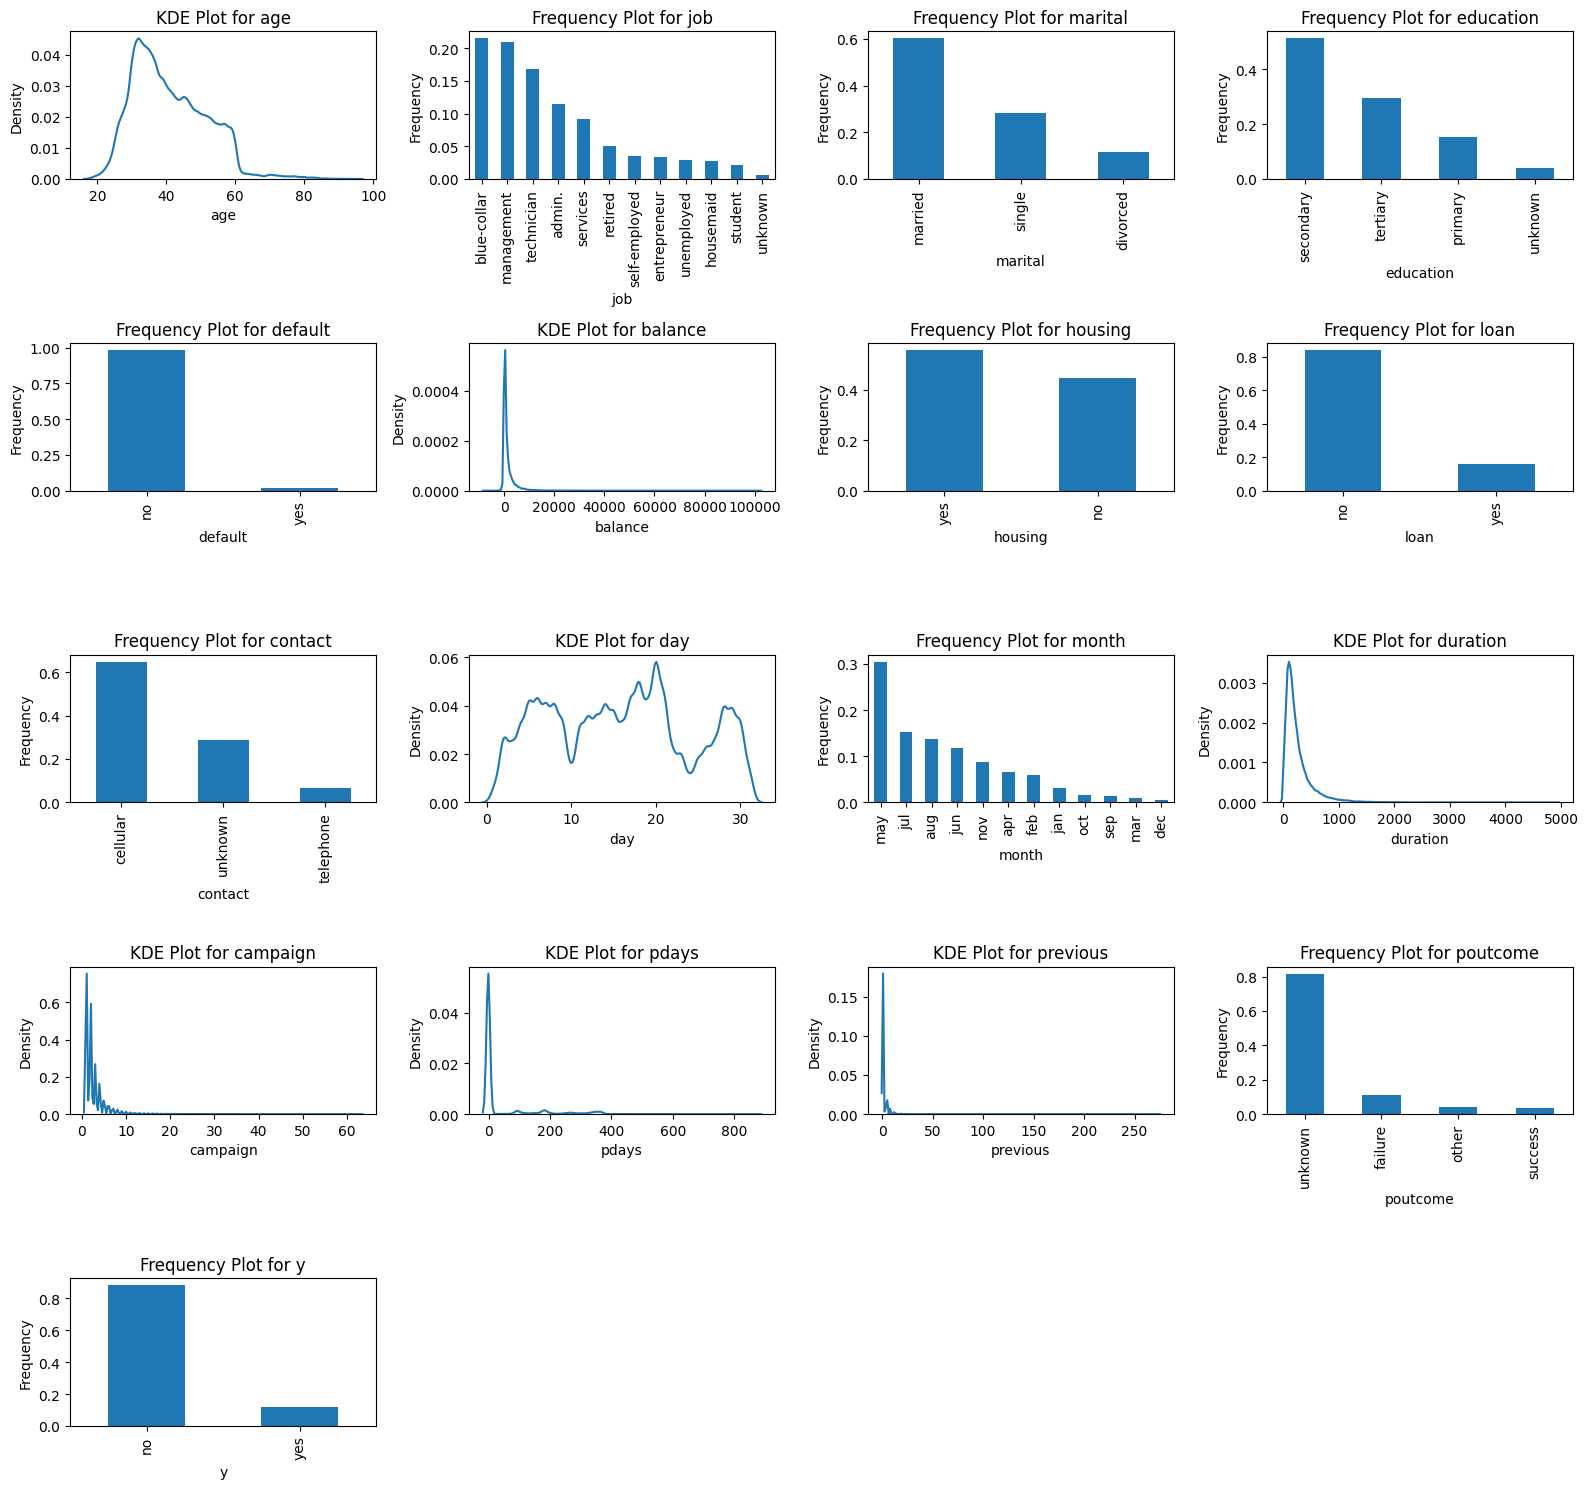

age: {'Normal': np.False_, 'Uniform': np.False_, 'Logarithmic': np.False_, 'Exponential': np.False_, 'Pareto': np.False_, 'Cauchy': np.False_}
job: Multimodal
marital: Multimodal
education: Multimodal
default: Dominant Category
balance: {'Normal': np.False_, 'Uniform': np.False_, 'Logarithmic': np.False_, 'Exponential': np.False_, 'Pareto': np.False_, 'Cauchy': np.False_}
housing: Multimodal
loan: Multimodal
contact: Multimodal
day: {'Normal': np.False_, 'Uniform': np.False_, 'Logarithmic': np.False_, 'Exponential': np.False_, 'Pareto': np.False_, 'Cauchy': np.False_}
month: Multimodal
duration: {'Normal': np.False_, 'Uniform': np.False_, 'Logarithmic': np.False_, 'Exponential': np.False_, 'Pareto': np.False_, 'Cauchy': np.False_}
campaign: {'Normal': np.False_, 'Uniform': np.False_, 'Logarithmic': np.False_, 'Exponential': np.False_, 'Pareto': np.False_, 'Cauchy': np.False_}
pdays: {'Normal': np.False_, 'Uniform': np.False_, 'Logarithmic': np.False_, 'Exponential': np.False_, 'Pareto'

In [184]:
# Analyzing data distribution
distribution_analysis = analyze_data_distribution(df_exploration)

# Displaying the result
for column, result in distribution_analysis.items():
    print(f"{column}: {result}")

1. **age**:
   - **Normal**: False
   - **Uniform**: False
   - **Logarithmic**: False
   - **Exponential**: False
   - **Pareto**: False
   - **Cauchy**: False

   **Interpretation**: The `age` column does not fit any of the tested distributions (Normal, Uniform, Logarithmic, Exponential, Pareto, Cauchy). This suggests that the age distribution is complex and does not follow a simple pattern, possibly being unconventional or highly variable.

2. **job**:
   - **Distribution**: Multimodal

   **Interpretation**: The `job` column is categorical and exhibits a multimodal distribution. This indicates that there are several distinct categories of jobs, each represented in varying proportions.

3. **marital**:
   - **Distribution**: Multimodal

   **Interpretation**: Similar to `job`, the `marital` column has a multimodal distribution, with multiple categories that are well-represented. The distribution is spread across various categories rather than being dominated by one.

4. **education**:
   - **Distribution**: Multimodal

   **Interpretation**: The `education` column also shows a multimodal distribution, indicating that there are multiple education levels represented in the dataset, with no single level dominating.

5. **default**:
   - **Distribution**: Dominant Category

   **Interpretation**: The `default` column has a dominant category, suggesting that one category (e.g., "no" in a default field) significantly outweighs the others.

6. **balance**:
   - **Normal**: False
   - **Uniform**: False
   - **Logarithmic**: False
   - **Exponential**: False
   - **Pareto**: False
   - **Cauchy**: False

   **Interpretation**: The `balance` column does not fit any of the tested distributions, similar to `age`. This implies that the distribution of balances is complex and does not adhere to conventional models.

7. **housing**:
   - **Distribution**: Multimodal

   **Interpretation**: The `housing` column exhibits a multimodal distribution, with several distinct categories. This indicates a diverse representation of housing status categories.

8. **loan**:
   - **Distribution**: Multimodal

   **Interpretation**: The `loan` column also shows a multimodal distribution, with various categories represented.

9. **contact**:
   - **Distribution**: Multimodal

   **Interpretation**: The `contact` column has a multimodal distribution, suggesting that different types of contact are represented in a diverse manner.

10. **day**:
    - **Normal**: False
    - **Uniform**: False
    - **Logarithmic**: False
    - **Exponential**: False
    - **Pareto**: False
    - **Cauchy**: False

    **Interpretation**: The `day` column does not fit any of the tested distributions, which may indicate an irregular or non-standard pattern for the days of the month.

11. **month**:
    - **Distribution**: Multimodal

    **Interpretation**: The `month` column shows a multimodal distribution, meaning various months are represented in a diverse manner.

12. **duration**:
    - **Normal**: False
    - **Uniform**: False
    - **Logarithmic**: False
    - **Exponential**: False
    - **Pareto**: False
    - **Cauchy**: False

    **Interpretation**: The `duration` column does not conform to any of the tested distributions, suggesting that the duration of contacts has a complex distribution.

13. **campaign**:
    - **Normal**: False
    - **Uniform**: False
    - **Logarithmic**: False
    - **Exponential**: False
    - **Pareto**: False
    - **Cauchy**: False

    **Interpretation**: The `campaign` column also does not fit any of the tested distributions, indicating a complex or irregular pattern for the number of contacts during the campaign.

14. **pdays**:
    - **Normal**: False
    - **Uniform**: False
    - **Logarithmic**: False
    - **Exponential**: False
    - **Pareto**: False
    - **Cauchy**: False

    **Interpretation**: The `pdays` column does not match any of the distributions tested, suggesting that the distribution of days since the last contact is complex.

15. **previous**:
    - **Normal**: False
    - **Uniform**: False
    - **Logarithmic**: False
    - **Exponential**: False
    - **Pareto**: False
    - **Cauchy**: False

    **Interpretation**: The `previous` column does not fit any of the tested distributions, indicating a complex distribution of previous contacts.

16. **poutcome**:
    - **Distribution**: Multimodal

    **Interpretation**: The `poutcome` column has a multimodal distribution, with several distinct categories of outcomes.

17. **y**:
    - **Distribution**: Multimodal

    **Interpretation**: The `y` column (typically indicating the campaign outcome) also shows a multimodal distribution, with various result categories.

### Summary

- **Multimodal Distributions**: Many categorical columns show multimodal distributions, indicating multiple distinct categories with varying frequencies.
- **Complex Numerical Distributions**: Numerical columns like `age`, `balance`, and `duration` do not fit conventional distributions, suggesting complex or non-standard patterns.
- **Dominant Category**: The `default` column has a dominant category, which could be useful for predictive modeling.

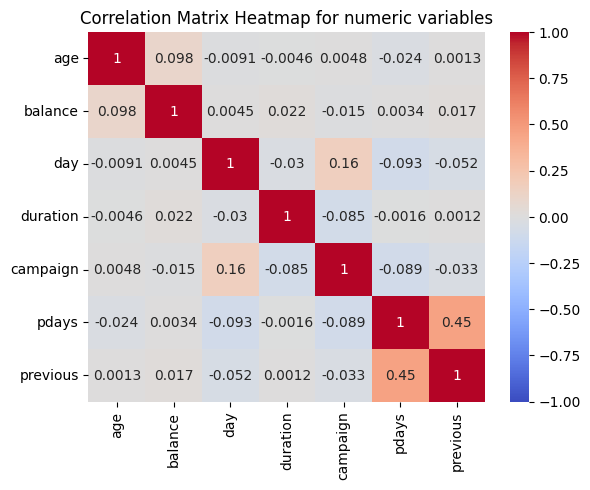

In [185]:
try:
    # Select numerical columns for the correlation matrix
    numeric_df = df_exploration.select_dtypes(include='number')

    # Create the correlation matrix
    corr_matrix = numeric_df.corr()

    # Create a heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
    plt.title('Correlation Matrix Heatmap for numeric variables')
    plt.show()

except Exception as e:
    # Log the error
    logger.error("Error while generating the correlation matrix heatmap: %s", e)

In [186]:
# Verifying unique values

for column in df_exploration.columns:
    print(f"column {column}:{df_exploration[column].unique()} -> {df_exploration[column].nunique()} unique values\n")
    

column age:[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] -> 77 unique values

column job:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] -> 12 unique values

column marital:['married' 'single' 'divorced'] -> 3 unique values

column education:['tertiary' 'secondary' 'unknown' 'primary'] -> 4 unique values

column default:['no' 'yes'] -> 2 unique values

column balance:[ 2143    29     2 ...  8205 14204 16353] -> 7168 unique values

column housing:['yes' 'no'] -> 2 unique values

column loan:['no' 'yes'] -> 2 unique values

column contact:['unknown' 'cellular' 'telephone'] -> 3 unique values

column day:[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31] -> 

In [206]:
def one_hot_encode_columns(df, columns, drop_first=True):
    """
    Applies One-Hot Encoding to the specified categorical columns of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to be encoded.
        columns (list): List of categorical columns to apply One-Hot Encoding.
        drop_first (bool): If True, removes the first encoded column to avoid multicollinearity. Default is True.

    Returns:
        pd.DataFrame: The DataFrame with the encoded columns.
    """
    try:
        # Checks whether the specified columns exist in the DataFrame
        missing_columns = [col for col in columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Columns not found in DataFrame: {missing_columns}")

        # Apply One-Hot Encoding
        df_encoded = pd.get_dummies(df, columns=columns, drop_first=drop_first)
        return df_encoded

    except ValueError as ve:
        logger.error(f"ValueError: {ve}")
        raise

    except Exception as e:
        logger.error(f"Unexpected error: {e}")
        raise

In [207]:
# Usage example
if __name__ == "__main__":
    
    categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    try:
        df_encoded = one_hot_encode_columns(df_exploration, categorical_columns, drop_first=False)
        print(df_encoded.head())
    except Exception as e:
        logger.error(f"Erro ao codificar colunas: {e}")

   age default  balance housing loan  day  duration  campaign  pdays  \
0   58      no     2143     yes   no    5       261         1     -1   
1   44      no       29     yes   no    5       151         1     -1   
2   33      no        2     yes  yes    5        76         1     -1   
3   47      no     1506     yes   no    5        92         1     -1   
4   33      no        1      no   no    5       198         1     -1   

   previous  ... month_jun  month_mar  month_may  month_nov  month_oct  \
0         0  ...     False      False       True      False      False   
1         0  ...     False      False       True      False      False   
2         0  ...     False      False       True      False      False   
3         0  ...     False      False       True      False      False   
4         0  ...     False      False       True      False      False   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0      False             False           False        

In [188]:
def apply_transformations(df, transformations):
    """
    Apply specified transformations to the columns of the DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame with the data.
    - transformations (dict): Dictionary of transformations to apply.
      Example: {
        'log': ['balance'],
        'sqrt': ['age'],
        'x2': ['duration'],
        'standardize': ['age', 'balance'],
        'normalize': ['duration']
      }
    """

    try:
        # Check if the DataFrame is empty
        if df.empty:
            raise ValueError("The DataFrame is empty.")
        
        # Log Transformations
        if 'log' in transformations:
            for col in transformations['log']:
                if col in df.columns:
                    df[col] = df[col].apply(lambda x: np.log(x + 1) if x > 0 else 0)
                else:
                    logger.warning(f"Column {col} not found for log transformation.")

        # Square Root Transformations
        if 'sqrt' in transformations:
            for col in transformations['sqrt']:
                if col in df.columns:
                    df[col] = df[col].apply(lambda x: np.sqrt(x) if x >= 0 else 0)
                else:
                    logger.warning(f"Column {col} not found for square root transformation.")

        # Squaring Transformations
        if 'x2' in transformations:
            for col in transformations['x2']:
                if col in df.columns:
                    df[col] = df[col] ** 2
                else:
                    logger.warning(f"Column {col} not found for squaring transformation.")

        # Standardization
        if 'standardize' in transformations:
            scaler = StandardScaler()
            for col in transformations['standardize']:
                if col in df.columns:
                    df[col] = scaler.fit_transform(df[[col]])
                else:
                    logger.warning(f"Column {col} not found for standardization.")

        # Normalization
        if 'normalize' in transformations:
            scaler = MinMaxScaler()
            for col in transformations['normalize']:
                if col in df.columns:
                    df[col] = scaler.fit_transform(df[[col]])
                else:
                    logger.warning(f"Column {col} not found for normalization.")
                    
        return df

    except Exception as e:
        logger.error(f"Error applying transformations: {e}")
        raise

In [189]:
# Example usage

transformations = {
     'log': ['balance'],
     'sqrt': ['age'],
     'x2': ['duration'],
     'standardize': ['age', 'balance'],
     'normalize': ['duration']
 }
df_transformed = apply_transformations(df_encoded, transformations)

In [190]:
def transform_yes_no_to_bool(df, columns):
    """
    Transform columns with 'yes' and 'no' values to boolean True and False.

    Parameters:
    - df (pd.DataFrame): DataFrame with columns to be transformed.
    - columns (list): List of column names that need transformation.

    Returns:
    - df (pd.DataFrame): DataFrame with transformed columns.
    """
    try:
        for column in columns:
            if column in df.columns:
                df[column] = df[column].map({'yes': True, 'no': False})
                logger.info(f"Column '{column}' transformed from 'yes'/'no' to boolean.")
            else:
                logger.warning(f"Column '{column}' not found in DataFrame.")
    except Exception as e:
        logger.error(f"Error during transformation of 'yes'/'no' columns: {e}")
        raise
    
    return df

In [191]:
columns_to_transform = ['default','housing','loan', 'y']
df_transformed = transform_yes_no_to_bool(df_transformed, columns_to_transform)
print(df_transformed)

            age  default   balance  housing   loan  day  duration  campaign  \
0      1.559526    False  0.845073     True  False    5  0.002816         1   
1      0.352670    False -0.687432     True  False    5  0.000943         1   
2     -0.738924    False -1.513980     True   True    5  0.000239         1   
3      0.625855    False  0.718519     True  False    5  0.000350         1   
4     -0.738924    False -1.659528    False  False    5  0.001621         1   
...         ...      ...       ...      ...    ...  ...       ...       ...   
45206  0.976878    False  0.502680    False  False   17  0.039465         3   
45207  2.554930    False  0.768056    False  False   17  0.008597         2   
45208  2.627562    False  1.197072    False  False   17  0.052513         5   
45209  1.478532    False  0.427006    False  False   17  0.010670         4   
45210 -0.323506    False  0.962297    False  False   17  0.005388         2   

       pdays  previous  ...  month_jun  month_mar  

In [192]:
def train_models(X_train, y_train):
    """
    Train initial models using various classification algorithms.

    Parameters:
    - X_train (pd.DataFrame): Training features.
    - y_train (pd.Series): Training labels.

    Returns:
    - models (dict): Dictionary with trained models.
    """
    models = {}
    try:
        # Initialize models
        models['Logistic Regression'] = make_pipeline(StandardScaler(), LogisticRegression())
        models['Decision Tree'] = DecisionTreeClassifier()
        models['Random Forest'] = RandomForestClassifier()
        models['SVM'] = make_pipeline(StandardScaler(), SVC(probability=True))
        models['Gradient Boosting'] = GradientBoostingClassifier()

        # Train models
        for name, model in models.items():
            model.fit(X_train, y_train)
            logger.info(f"{name} trained successfully.")
        
    except Exception as e:
        logger.error(f"Error during model training: {e}")
        raise
    return models

In [193]:
def evaluate_models(models, X_test, y_test):
    """
    Evaluate the performance of each model.

    Parameters:
    - models (dict): Dictionary with trained models.
    - X_test (pd.DataFrame): Test features.
    - y_test (pd.Series): Test labels.

    Returns:
    - performance (pd.DataFrame): DataFrame with evaluation metrics for each model.
    """
    performance = []
    try:
        for name, model in models.items():
            y_pred = model.predict(X_test)
            metrics = {
                'Model': name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
            }
            performance.append(metrics)
            logger.info(f"Performance evaluated for {name}.")
        
        performance_df = pd.DataFrame(performance)
        
    except Exception as e:
        logger.error(f"Error during model evaluation: {e}")
        raise
    return performance_df

In [194]:
def analyze_variables(models, X_train, y_train):
    """
    Analyze significant variables to understand feature importance.

    Parameters:
    - models (dict): Dictionary with trained models.
    - X_train (pd.DataFrame): Training features.
    - y_train (pd.Series): Training labels.
    
    Returns:
    - variable_importance (pd.DataFrame): DataFrame with feature importance.
    """
    try:
        importances = []
        for name, model in models.items():
            if hasattr(model, 'feature_importances_'):
                importance = model.feature_importances_
                importances.append((name, importance))
                logger.info(f"Variable analysis completed for {name}.")
        
        # Combine importances into a DataFrame
        importance_df = pd.DataFrame(importances, columns=['Model', 'Importances'])
        
    except Exception as e:
        logger.error(f"Error during variable analysis: {e}")
        raise
    return importance_df

In [195]:
def error_analysis(models, X_test, y_test):
    """
    Analyze errors made by each model.

    Parameters:
    - models (dict): Dictionary with trained models.
    - X_test (pd.DataFrame): Test features.
    - y_test (pd.Series): Test labels.
    
    Returns:
    - error_analysis (dict): Dictionary with error analysis for each model.
    """
    error_analysis = {}
    try:
        for name, model in models.items():
            y_pred = model.predict(X_test)
            errors = (y_test != y_pred)
            error_analysis[name] = errors
            logger.info(f"Error analysis completed for {name}.")
        
    except Exception as e:
        logger.error(f"Error during error analysis: {e}")
        raise
    return error_analysis

In [196]:
def feature_engineering_selection(X_train, y_train):
    """
    Perform feature engineering and selection based on model performance.

    Parameters:
    - X_train (pd.DataFrame): Training features.
    - y_train (pd.Series): Training labels.

    Returns:
    - X_train_selected (pd.DataFrame): DataFrame with selected features.
    """
    try:
        # Example of feature selection using a basic threshold for importance
        # Note: This is a placeholder; adjust feature engineering/selection as needed
        # Here we use all features for simplicity
        X_train_selected = X_train
        logger.info("Feature engineering and selection completed.")
        
    except Exception as e:
        logger.error(f"Error during feature engineering and selection: {e}")
        raise
    return X_train_selected

In [197]:
def compare_models(performance_df):
    """
    Compare different models and select top performers.

    Parameters:
    - performance_df (pd.DataFrame): DataFrame with evaluation metrics for each model.

    Returns:
    - top_models (pd.DataFrame): DataFrame with top-performing models.
    """
    try:
        top_models = performance_df.sort_values(by='ROC AUC', ascending=False)
        logger.info("Model comparison completed.")
        
    except Exception as e:
        logger.error(f"Error during model comparison: {e}")
        raise
    return top_models

In [198]:
def hyperparameter_tuning(models, X_train, y_train):
    """
    Fine-tune hyperparameters using cross-validation.

    Parameters:
    - models (dict): Dictionary with trained models.
    - X_train (pd.DataFrame): Training features.
    - y_train (pd.Series): Training labels.

    Returns:
    - tuned_models (dict): Dictionary with tuned models.
    """
    tuned_models = {}
    try:
        for name, model in models.items():
            if hasattr(model, 'get_params'):
                param_grid = {k: [v] for k, v in model.get_params().items() if k != 'random_state'}
                grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
                grid_search.fit(X_train, y_train)
                tuned_models[name] = grid_search.best_estimator_
                logger.info(f"Hyperparameter tuning completed for {name}.")
        
    except Exception as e:
        logger.error(f"Error during hyperparameter tuning: {e}")
        raise
    return tuned_models

In [199]:
def ensemble_methods(models, X_train, y_train):
    """
    Combine multiple models to improve performance.

    Parameters:
    - models (dict): Dictionary with trained models.
    - X_train (pd.DataFrame): Training features.
    - y_train (pd.Series): Training labels.

    Returns:
    - ensemble_model (VotingClassifier): Ensemble model.
    """
    try:
        # Example of a simple voting classifier ensemble
        ensemble_model = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
        ensemble_model.fit(X_train, y_train)
        logger.info("Ensemble methods applied successfully.")
        
    except Exception as e:
        logger.error(f"Error during ensemble methods: {e}")
        raise
    return ensemble_model

In [200]:
def final_performance_measurement(model, X_test, y_test):
    """
    Assess the final model's performance on a test set.

    Parameters:
    - model (object): Final model.
    - X_test (pd.DataFrame): Test features.
    - y_test (pd.Series): Test labels.

    Returns:
    - metrics (dict): Dictionary with evaluation metrics for the final model.
    """
    try:
        y_pred = model.predict(X_test)
        metrics = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        }
        logger.info("Final performance measurement completed.")
        
    except Exception as e:
        logger.error(f"Error during final performance measurement: {e}")
        raise
    return metrics

In [201]:
def run_pipeline(df_transformed):
    """
    Run a complete data science pipeline including model training, evaluation, 
    variable analysis, error analysis, feature engineering, and hyperparameter tuning.
    
    Parameters:
    - df_transformed (pd.DataFrame): Transformed DataFrame with features and target variable 'y'.
    
    Returns:
    - final_metrics (str): Final metrics of the best model on the test set.
    """
    try:
        # Step 1: Data Preparation
        X = df_transformed.drop('y', axis=1)
        y = df_transformed['y']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        logger.info("Data split into training and test sets.")

        # Step 2: Initial Training
        models = train_models(X_train, y_train)
        logger.info("Initial models trained.")

        # Step 3: Performance Evaluation
        performance_df = evaluate_models(models, X_test, y_test)
        logger.info("Models evaluated.")
        
        # Step 4: Variable Analysis
        variable_importance_df = analyze_variables(models, X_train, y_train)
        logger.info("Variable importance analyzed.")
        
        # Step 5: Error Analysis
        error_analysis_dict = error_analysis(models, X_test, y_test)
        logger.info("Error analysis completed.")
        
        # Step 6: Feature Engineering and Selection
        X_train_selected = feature_engineering_selection(X_train, y_train)
        logger.info("Feature engineering and selection completed.")
        
        # Step 7: Model Comparison
        top_models_df = compare_models(performance_df)
        logger.info("Models compared.")
        
        # Step 8: Hyperparameter Tuning
        tuned_models = hyperparameter_tuning(models, X_train_selected, y_train)
        logger.info("Hyperparameters tuned.")
        
        # Step 9: Ensemble Methods
        ensemble_model = ensemble_methods(tuned_models, X_train_selected, y_train)
        logger.info("Ensemble model created.")
        
        # Step 10: Final Performance Measurement
        final_metrics = final_performance_measurement(ensemble_model, X_test, y_test)
        logger.info("Final performance measurement completed.")
        
        return final_metrics
    
    except Exception as e:
        logger.error(f"An error occurred during pipeline execution: {e}")
        return None



In [202]:
# Example usage
final_metrics = run_pipeline(df_transformed)

In [203]:
def print_detailed_report(performance_df, variable_importance_df, error_analysis_dict, 
                          top_models_df, final_metrics):
    """
    Print detailed reports for model performance, variable importance, error analysis, 
    feature selection, and top models.
    
    Parameters:
    - performance_df (pd.DataFrame): DataFrame containing model performance metrics.
    - variable_importance_df (pd.DataFrame): DataFrame containing variable importance metrics.
    - error_analysis_dict (dict): Dictionary containing error analysis details.
    - X_train_selected (pd.DataFrame): DataFrame with selected features for training.
    - top_models_df (pd.DataFrame): DataFrame with top-performing models.
    - final_metrics (str): Final metrics report as a string.
    """
    separator = '=' * 80
    
    try:
        print("Performance Dataframe:")
        print(performance_df.to_string())
        print(separator)
    except Exception as e:
        logger.error(f"Failed to print Performance Dataframe: {e}")
    
    try:
        print("Variable Importance Dataframe:")
        print(variable_importance_df.to_string())
        print(separator)
    except Exception as e:
        logger.error(f"Failed to print Variable Importance Dataframe: {e}")
    
    try:
        print("Error Analysis Dictionary:")
        for key, value in error_analysis_dict.items():
            print(f"{key}: {value}")
        print(separator)
    except Exception as e:
        logger.error(f"Failed to print Error Analysis Dictionary: {e}")
       
    try:
        print("Top Models Dataframe:")
        print(top_models_df.to_string())
        print(separator)
    except Exception as e:
        logger.error(f"Failed to print Top Models Dataframe: {e}")
    
    try:
        print("Final Metrics:")
        print(final_metrics)
    except Exception as e:
        logger.error(f"Failed to print Final Metrics: {e}")

In [205]:
# Example usage:
print_detailed_report(performance_df, variable_importance_df, error_analysis_dict, 
                      top_models_df, final_metrics)

Performance Dataframe:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.896273   0.663113  0.285060  0.398718  0.881384
1        Decision Tree  0.874489   0.480251  0.490376  0.485261  0.708782
2        Random Forest  0.901692   0.655864  0.389551  0.488787  0.925805
3                  SVM  0.898927   0.655536  0.341888  0.449398  0.904721
4    Gradient Boosting  0.902798   0.652738  0.415215  0.507563  0.922308
Variable Importance Dataframe:
               Model                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### 1. Performance Dataframe

This DataFrame shows the performance of various machine learning models evaluated in terms of Accuracy, Precision, Recall, F1 Score, and ROC AUC. The values are described below:

- **Logistic Regression**
  - **Accuracy**: 0.896273 - The model correctly predicts 89.63% of the cases.
  - **Precision**: 0.663113 - When the model predicts a positive class, it is correct 66.31% of the time.
  - **Recall**: 0.285060 - The model correctly identifies 28.51% of the actual positive cases.
  - **F1 Score**: 0.398718 - A metric that combines precision and recall; the harmonic mean is 39.87%.
  - **ROC AUC**: 0.881384 - The area under the ROC curve, indicating good model capability to distinguish between classes.

- **Decision Tree**
  - **Accuracy**: 0.874489 - The model correctly predicts 87.45% of the cases.
  - **Precision**: 0.480251 - Precision of 48.03% for the positive class.
  - **Recall**: 0.490376 - Recall of 49.04%.
  - **F1 Score**: 0.485261 - F1 Score of 48.53%.
  - **ROC AUC**: 0.708782 - Lower AUC, indicating poorer discriminative ability.

- **Random Forest**
  - **Accuracy**: 0.901692 - The model correctly predicts 90.17% of the cases.
  - **Precision**: 0.655864 - Precision of 65.59% for the positive class.
  - **Recall**: 0.389551 - Recall of 38.95%.
  - **F1 Score**: 0.488787 - F1 Score of 48.88%.
  - **ROC AUC**: 0.925805 - High AUC, indicating excellent discriminative ability.

- **SVM**
  - **Accuracy**: 0.898927 - The model correctly predicts 89.89% of the cases.
  - **Precision**: 0.655536 - Precision of 65.55%.
  - **Recall**: 0.341888 - Recall of 34.19%.
  - **F1 Score**: 0.449398 - F1 Score of 44.94%.
  - **ROC AUC**: 0.904721 - Good discriminative ability.

- **Gradient Boosting**
  - **Accuracy**: 0.902798 - The model correctly predicts 90.28% of the cases.
  - **Precision**: 0.652738 - Precision of 65.27%.
  - **Recall**: 0.415215 - Recall of 41.52%.
  - **F1 Score**: 0.507563 - F1 Score of 50.76%.
  - **ROC AUC**: 0.922308 - High AUC.

### 2. Variable Importance Dataframe

This DataFrame shows the importance of variables for each model:

- **Decision Tree**: Variables have different importances, with some variables being more influential in the model’s predictions.
- **Random Forest**: Similar to Decision Tree but may show more variation due to the ensemble of multiple decision trees.
- **Gradient Boosting**: The variable with the highest importance is the most influential in the model’s predictions, with some variables having very low importance.

### 3. Error Analysis Dictionary

This dictionary shows the error analysis for each model. Each model is evaluated based on incorrect (False) and correct (True) predictions, with the index representing the sample index and the column y indicating the true label.

- **Logistic Regression**: A series of true/false values indicating correct/incorrect predictions for each instance.
- **Decision Tree**: Similar series for predictions made by the Decision Tree model.
- **Random Forest**: Indicates whether the Random Forest model’s predictions were correct or incorrect.
- **SVM**: Error analysis for the SVM model, showing prediction accuracy.
- **Gradient Boosting**: True/false values reflecting the performance of the Gradient Boosting model.

### 4. Top Models Dataframe

This DataFrame ranks the models based on their performance metrics, showing which models are the best:

- **Random Forest and Gradient Boosting** are at the top with better precision, recall, and F1 Score metrics.
- **Logistic Regression and SVM** are slightly lower but still competitive.
- **Decision Tree** is the model with the lowest overall performance.

### 5. Final Metrics

This is a summary of the final metrics for the model with the best performance in the test:

- **Accuracy**: 0.903129 - The model has an overall accuracy of 90.31%.
- **Precision**: 0.674230 - Precision of 67.42%.
- **Recall**: 0.381302 - Recall of 38.13%.
- **F1 Score**: 0.487119 - F1 Score of 48.71%.
- **ROC AUC**: 0.923679 - AUC of 92.37%.

### Detailed Interpretation of Final Metrics

Let’s explore the final metrics in more detail and what each one means in practice, especially in terms of application in a real-world project.

1. **Accuracy**
   - **Value**: 0.903129 (or 90.31%)
   - **What It Is**: Accuracy is the proportion of correct predictions made by the model relative to the total number of predictions. In other words, it’s the percentage of cases where the model’s prediction was correct.
   - **In Practice**: High accuracy means the model performs well in predicting the class for most cases. However, accuracy might be misleading if the classes are imbalanced (e.g., if 90% of the samples belong to one class). Thus, it’s important to consider other metrics alongside accuracy.

2. **Precision**
   - **Value**: 0.674230 (or 67.42%)
   - **What It Is**: Precision measures the proportion of true positives among all positive predictions made by the model. In other words, when the model predicts a positive class, precision indicates the likelihood that this prediction is correct.
   - **In Practice**: High precision is critical in situations where false positives have significant negative consequences. For example, in medical diagnoses, you want the model to have high precision to avoid false alarms.

3. **Recall**
   - **Value**: 0.381302 (or 38.13%)
   - **What It Is**: Recall measures the proportion of true positives among all actual positive cases. In other words, it’s the model’s ability to identify all actual positive cases.
   - **In Practice**: High recall is important in situations where detecting all positive cases is crucial, even if it includes some false positives. For instance, in fraud detection, a system should have high recall to identify as many fraudulent transactions as possible.

4. **F1 Score**
   - **Value**: 0.487119 (or 48.71%)
   - **What It Is**: The F1 Score is the harmonic mean of precision and recall. It’s a metric that balances precision and recall, offering a more comprehensive view of the model’s performance, especially when there is a trade-off between precision and recall.
   - **In Practice**: The F1 Score is useful when you need a balance between precision and recall. In many cases, such as medical diagnostics or recommendation systems, a good F1 Score ensures that the model is both accurate and complete.

5. **ROC AUC**
   - **Value**: 0.923679 (or 92.37%)
   - **What It Is**: ROC AUC (Area Under the Receiver Operating Characteristic Curve) measures the model’s ability to distinguish between classes. The AUC ranges from 0 to 1, where 1 indicates a perfect model and 0.5 indicates a model that cannot distinguish between classes better than random guessing.
   - **In Practice**: A high ROC AUC suggests that the model has excellent discriminative ability between positive and negative classes. It is a robust metric for evaluating the overall performance of classification models and is useful in contexts with imbalanced classes.

### Summary of Metric Application

- **Accuracy**: Provides a general overview of performance but may not be sufficient if classes are imbalanced.
- **Precision**: Important when minimizing false positives is crucial.
- **Recall**: Essential when detecting as many true positives as possible is important, even if it includes some false positives.
- **F1 Score**: Balances precision and recall, ideal when there is a trade-off between these two.
- **ROC AUC**: Offers a comprehensive view of the model’s discriminative ability, especially useful in imbalanced class scenarios.

Each of these metrics helps evaluate different aspects of model performance, and together they provide a more complete view of how the model performs in a real-world application.